In [185]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [186]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [187]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [188]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [189]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [190]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [191]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [192]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [196]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

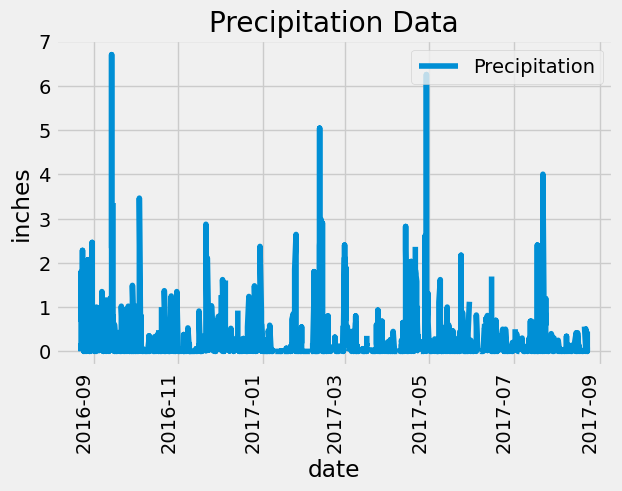

In [204]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recent_date = dt.date(2017, 8, 23)

# Calculate the date one year from the last date in data set.
year_ago = recent_date - dt.timedelta(days=365)
year_ago

# Perform a query to retrieve the data and precipitation scores
measure_query = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= year_ago).\
    order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
measure_df = pd.DataFrame(measure_query, columns = ['date', 'prcp'])
measure_df = measure_df.rename(columns = {'date': 'Date', 'prcp': 'Precipitation'})

measure_df["Date"] = pd.to_datetime(measure_df["Date"])

# Sort the dataframe by date
measure_df = measure_df.sort_values('Date')
measure_df

# Use Pandas Plotting with Matplotlib to plot the data
measure_df.plot(kind = "line", title = "Precipitation Data", x = 'Date', y = 'Precipitation', 
                xlabel = "date", ylabel = "inches", rot = 90)
plt.legend(loc="upper right")
plt.show()

In [165]:
# Use Pandas to calculate the summary statistics for the precipitation data
measure_df.describe

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [166]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(Station.station)).all()

[(9,)]

In [167]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [168]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
mostactive = active[0]

sel = [Measurement.station, 
       func.min(Measurement.tobs),
       func.max(Measurement.tobs),
       func.avg(Measurement.tobs)]

active_temp = session.query(*sel).\
    filter(Measurement.station == "USC00519281").all()
active_temp

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

<Axes: title={'center': 'Most active station temperatures'}, xlabel='Temperature', ylabel='Frequency'>

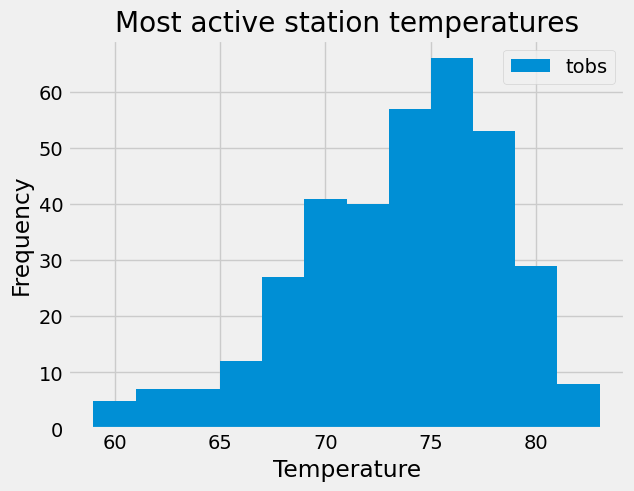

In [169]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_station = session.query(Measurement.tobs).\
    filter(Measurement.date >= year_ago).\
    filter(Measurement.station == "USC00519281").all()

active_station_df = pd.DataFrame(active_station, columns = ['tobs'])

active_station_df.plot(kind = "hist", bins = 12, 
                       title = "Most active station temperatures", 
                       xlabel = "Temperature", ylabel = "Frequency")

# Close Session

In [170]:
# Close Session
session.close()